In [3]:
# Initialisation(s)

import os, sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    # Running in Google CoLab
    from google.colab import drive
    drive.mount('/content/gdrive/')
    global_prefix = '/content/gdrive/MyDrive/Colab Notebooks/Jupyter-Puzzles/python/programmationContraintes/cpmpy/explications/sudoku/'
    os.chdir(global_prefix)
else:
    # Not running in Google CoLab
    global_prefix = os.getcwd().replace('\\','/') + '/'

sys.path.append(f'{global_prefix}../../../../outils')
import displayImages
display_images = displayImages.mpl if IN_COLAB else displayImages.widgets

%run ../explications.ipynb

# Sudoku
## Génération des explications
### Modélisation

In [4]:
# cellule vide
e = 0

def model_sudoku(given):
    """
    retourne un triplet vars, facts, constraints
    utilisable dans EXPLANATION
    """

    # Dimensions
    ncol = nrow = len(given)
    n = int(ncol ** (1/2))

    # Variables
    cells = intvar(1,ncol,shape=given.shape,name="cells")
    
    # faits
    facts = [cells[given != e] == given[given != e]]
    
    # contraintes sur les lignes
    row_cons = [AllDifferent(row) for row in cells]
    # contraintes sur les colonnes
    col_cons = [AllDifferent(col) for col in cells.T]
    # Constraintes sur les blocs
    block_cons = []
    for i in range(0,nrow, n):
        for j in range(0,ncol, n):
            block_cons += [AllDifferent(cells[i:i+n, j:j+n])]

    return cells, facts, row_cons + col_cons + block_cons

### Exemples

In [5]:
given_4x4 = np.array([
    [ e, 3, 4, e ],
    [ 4, e, e, 2 ],
    [ 1, e, e, 3 ],
    [ e, 2, 1, e ]])

explanation_4x4 = EXPLANATION(*model_sudoku(given_4x4))

given_9x9 = np.array([
    [e, e, e,  2, e, 5,  e, e, e],
    [e, 9, e,  e, e, e,  7, 3, 2],
    [e, e, 2,  e, e, 9,  e, 6, e],

    [2, e, e,  e, e, e,  4, e, 9],
    [e, e, e,  e, 7, e,  e, e, e],
    [6, e, 9,  e, e, e,  e, e, 1],

    [e, 8, e,  4, e, e,  1, e, e],
    [e, 6, 3,  e, e, e,  e, 8, e],
    [e, 2, e,  6, e, 8,  e, e, e]])

explanation_9x9 = EXPLANATION(*model_sudoku(given_9x9))

### Solution

In [6]:
explanation_4x4.solve()

array([[2, 3, 4, 1],
       [4, 1, 3, 2],
       [1, 4, 2, 3],
       [3, 2, 1, 4]])

### Génération d'une explication

In [7]:
_ = explanation_4x4.explain()


Facts (E)
   cells[1,0] == 4
   cells[3,1] == 2

Constraints (S)
   alldifferent(cells[0,1],cells[1,1],cells[2,1],cells[3,1])
   alldifferent(cells[0,0],cells[0,1],cells[1,0],cells[1,1])

=> Hint (N)
   cells[0,0] == 2


### Génération de la liste des explications pour la résolution complète

In [8]:
_ = explanation_4x4.explainFull()


Facts (E)
   cells[1,0] == 4
   cells[3,1] == 2

Constraints (S)
   alldifferent(cells[0,1],cells[1,1],cells[2,1],cells[3,1])
   alldifferent(cells[0,0],cells[0,1],cells[1,0],cells[1,1])

=> Hint (N)
   cells[0,0] == 2

Facts (E)
   cells[2,0] == 1
   cells[1,0] == 4
   cells[0,0] == 2

Constraints (S)
   alldifferent(cells[0,0],cells[1,0],cells[2,0],cells[3,0])

=> Hint (N)
   cells[3,0] == 3

Facts (E)
   cells[0,2] == 4
   cells[2,3] == 3

Constraints (S)
   alldifferent(cells[0,2],cells[0,3],cells[1,2],cells[1,3])
   alldifferent(cells[0,3],cells[1,3],cells[2,3],cells[3,3])

=> Hint (N)
   cells[1,2] == 3

Facts (E)
   cells[2,0] == 1
   cells[0,1] == 3

Constraints (S)
   alldifferent(cells[0,0],cells[1,0],cells[2,0],cells[3,0])
   alldifferent(cells[0,0],cells[0,1],cells[1,0],cells[1,1])

=> Hint (N)
   cells[1,1] == 1

Facts (E)
   cells[1,0] == 4
   cells[3,1] == 2

Constraints (S)
   alldifferent(cells[2,0],cells[2,1],cells[3,0],cells[3,1])
   alldifferent(cells[0,0],cells[1,

## Affichage des explications
### Affichage d'une grille de sudoku et affichage d'une grille avec explication 

In [9]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
 
def plot_sudoku(grid, file = '', hint = None):

    ncol = len(grid)
    n = int(ncol ** (1/2))

    matplotlib.rcParams['toolbar'] = 'None'
    fig = plt.figure(facecolor='w', figsize = (ncol,ncol))
    ax = fig.add_subplot(111)
    ax.axis('off')
    ax.axis('equal')
    
    for i in range(0,ncol + 1,n):
        ax.plot([i,i],[0,ncol], linewidth = 2, color = 'k')
        ax.plot([0,ncol],[i,i], linewidth = 2, color = 'k')
    for i in range(1,ncol):
        ax.plot([i,i],[0,ncol], linewidth = 1, color = 'k')
        ax.plot([0,ncol],[i,i], linewidth = 1, color = 'k')
        
    def plot_value(i, j, v, color = 'k'):
        ax.text(j + .5, ncol - i - .5, str(v), size = 18, ha = 'center',
                va = 'center', color = color)
        
    for i in range(ncol):
        for j in range(ncol):
            v = grid[i][j]
            if v:
                plot_value(i, j, v)

    def  plot_circle(i, j):
        ax.add_patch(plt.Circle((j + .5, ncol - i - .5), .3, fill = False, ec = 'blue'))
                
    def plot_rectangle(i = None, j = None, k = None): 
        if i is not None:
            j, w, h = 0, ncol, 1
        elif j is not None:
            i, w, h = ncol - 1, 1, ncol
        else: 
            i, j, w, h = n * (k // n) + n - 1, n * (k % n) , n, n
        ax.add_patch(plt.Rectangle((j + .1, ncol - i - 1. + .1),w - .2, h - .2, fill = False, ec = 'green'))
        
    if hint:
        
        E,S,N = hint
        
        for (i,j), _ in extractFacts(E):
            plot_circle(i,j)
            
        for l in extractConstraints(S):
            if len({c[0] for c in l}) == 1:
                plot_rectangle(i = l[0][0])
            elif len({c[1] for c in l}) == 1:
                plot_rectangle(j = l[0][1])
            else:
                i, j = l[0]
                plot_rectangle(k = n * (i // n) + j // n)
        
        (i,j),v = extractHint(N)
        plot_value(i,j,v, color = 'red')
                    
    ax.plot()
    if file:
        plt.savefig(file)
        plt.close() # évite l'affichage

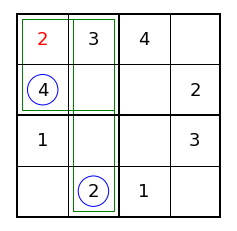

In [10]:
plot_sudoku(given_4x4, hint = explanation_4x4.explain(verbose = False)) 

### Enregistrement sur disque des images des explications

In [10]:
from copy import deepcopy

ESNlist = explanation_4x4.explainFull(verbose = False)
g = deepcopy(given_4x4)
prefix = f'{global_prefix}images/given_4x4-'

for c, hint in enumerate(ESNlist):
    
    (i, j), v = extractHint(hint[2])
    plot_sudoku(g, file = f'{prefix}{c}', hint = hint)
    g[i][j] = v
    
plot_sudoku(g, file = f'{prefix}{len(ESNlist)}')

### Affichage des explications

In [14]:
display_images(f'{global_prefix}images/given_4x4-', len(ESNlist), dpi = 90)

interactive(children=(IntSlider(value=0, description='t', max=8), Output()), _dom_classes=('widget-interact',)…

Button(description='▷', style=ButtonStyle())

En remplaçant 4x4 par 9x9 et après 4h30 de calculs :

In [ ]:
display_images(f'{global_prefix}images/given_9x9-', 56, dpi = 150)